# Eurostat mortality data over Europe

The [mortality](https://earthdatahub.com/collections/eurostat/datasets/geoprocessed-eurostat-mortality-demo_r_mweek3) data set is created from the [Eurostat data](https://ec.europa.eu/eurostat/cache/metadata/en/demomwk_esms.htm). 

The Eurostat dataset was geoprocessed to rasterize and process the `dataset`.

The dataset can be easily integrated and visualized. For that the Python library `xarray` is used.

In [1]:
import xarray as xr

The `dataset` is defined.

In [2]:
dataset = "s3://eurostat/demo_r_mweek3-20000103-20231030.zarr"

Then the data is read and the general dataset information is shown.

In [3]:

ds = xr.open_dataset(
    dataset,
    engine="zarr",
    chunks={}
)

ds

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<xarray.Dataset>
Dimensions:         (time: 1240, lat: 480, lon: 720)
Coordinates:
  * lat             (lat) float64 26.0 26.1 26.2 26.3 ... 73.6 73.7 73.8 73.9
  * lon             (lon) float64 -27.0 -26.9 -26.8 -26.7 ... 44.7 44.8 44.9
  * time            (time) datetime64[ns] 2000-01-03 2000-01-10 ... 2023-10-30
Data variables: (12/17)
    L0_NR_T_Y65_69  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L0_NR_T_Y70_74  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L0_NR_T_Y75_79  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L0_NR_T_Y80_84  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L1_NR_T_Y65_69  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L1_NR_T_Y70_74  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    ...              ...
    L2_NR_T_Y80_84  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L3_NR_T_Y65_69  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L3_NR_T_Y70_74  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L3_NR_T_Y75_79  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    L3_NR_T_Y80_84  (time, lat, lon) float64 dask.array<chunksize=(78, 60, 90), meta=np.ndarray>
    spatial_ref     int64 ...
Attributes:
    AREA_OR_POINT:     Area
    TIFFTAG_SOFTWARE:  GRASS GIS 8.3.2dev with GDAL 3.6.4
    _FillValue:        nan
    add_offset:        0.0
    scale_factor:      1.0

Investigate the available date variables.

In [4]:
for var in ds.data_vars:
    if var != "spatial_ref":
        print(f"name: {var}\ndescription: {ds[var].description}\nunit: {ds[var].unit}\n")

name: L0_NR_T_Y65_69
description: NUTS_Level: L0; Sex: Total; Age class: From 65 to 69 years
unit: Number

name: L0_NR_T_Y70_74
description: NUTS_Level: L0; Sex: Total; Age class: From 70 to 74 years
unit: Number

name: L0_NR_T_Y75_79
description: NUTS_Level: L0; Sex: Total; Age class: From 75 to 79 years
unit: Number

name: L0_NR_T_Y80_84
description: NUTS_Level: L0; Sex: Total; Age class: From 80 to 84 years
unit: Number

name: L1_NR_T_Y65_69
description: NUTS_Level: L1; Sex: Total; Age class: From 65 to 69 years
unit: Number

name: L1_NR_T_Y70_74
description: NUTS_Level: L1; Sex: Total; Age class: From 70 to 74 years
unit: Number

name: L1_NR_T_Y75_79
description: NUTS_Level: L1; Sex: Total; Age class: From 75 to 79 years
unit: Number

name: L1_NR_T_Y80_84
description: NUTS_Level: L1; Sex: Total; Age class: From 80 to 84 years
unit: Number

name: L2_NR_T_Y65_69
description: NUTS_Level: L2; Sex: Total; Age class: From 65 to 69 years
unit: Number

name: L2_NR_T_Y70_74
description: NUT

One of the available data variabels is selected.
`L3_NR_T_Y65_69` describes data on NUTS level 3 in the unit of total number of deaths for the age group 65-69.

In [4]:
selected_data = "L3_NR_T_Y65_69"

Define desired events and locations to visualize the selected data variable.

In [5]:
events = {
    "italy-rome": {
        "area": {"lat": slice(34, 48), "lon": slice(5, 20)},
        "location": {"lat": 41.89, "lon": 12.51, "method": "nearest"},
        "time": ["2000-01-10"],
    },
    "spain-madrid": {
        "area": {"lat": slice(35, 44), "lon": slice(-10, 5)},
        "location": {"lat": 40.42, "lon": -3.71, "method": "nearest"},
        "time": ["2000-01-10"],
    },
    "albania-tirana": {
        "area": {"lat": slice(39, 43), "lon": slice(19, 21)},
        "location": {"lat": 41.33, "lon": 19.82, "method": "nearest"},
        "time": ["2000-01-10"],
    },
    "france-lyon": {
        "area": {"lat": slice(41, 51), "lon": slice(-5, 10)},
        "location": {"lat": 45.76, "lon": 4.83, "method": "nearest"},
        "time": ["2000-01-10"],
    },
}

Select one of the defined events.

In [6]:
selected_event = "italy-rome"

area = events[selected_event]["area"]
location = events[selected_event]["location"]
time = events[selected_event]["time"]

Visualize the first set time (`time[0]`) of the selected dataset. The plot is a map for one point in time.

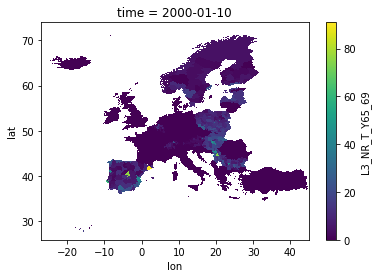

In [7]:
_ = ds[selected_data].sel(time=[time[0]]).plot()

Specifing the time and narrowing down the selected area.

In [8]:
ds_event = ds[selected_data].sel(**area).sel(time=time)
ds_event

<xarray.DataArray 'L3_NR_T_Y65_69' (time: 1, lat: 141, lon: 151)>
dask.array<getitem, shape=(1, 141, 151), dtype=float64, chunksize=(1, 60, 90), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 34.0 34.1 34.2 34.3 34.4 ... 47.6 47.7 47.8 47.9 48.0
  * lon      (lon) float64 5.0 5.1 5.2 5.3 5.4 5.5 ... 19.6 19.7 19.8 19.9 20.0
  * time     (time) datetime64[ns] 2000-01-10
Attributes:
    grid_mapping:  spatial_ref

Visualize the event snippet of the dataset. The plot is a map for one point in time.

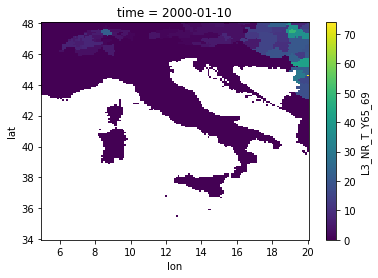

In [9]:
_ = ds_event.sel(time=[time[0]]).plot()

The dataset can also be plotted as a time series for one selected location.

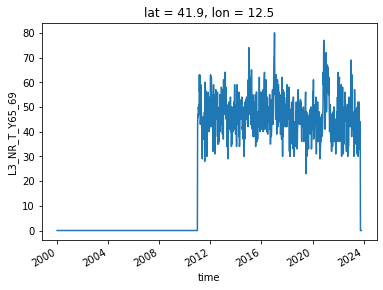

In [10]:
_ = ds.sel(**location)[selected_data].plot()
